In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
from itertools import combinations

In [2]:
with open('./data/2016_q1_newman-neighbours_kcore.pickle', 'rb') as picklefile:
    nbrs = pickle.load(picklefile)

In [3]:
with open('./data/2016_q1_newman-weights_kcore.pickle', 'rb') as picklefile:
    weights = pickle.load(picklefile)

In [4]:
len(weights)

1062244

In [5]:
len(nbrs)

3053

In [7]:
#map ids to 0-3052
keys = range(len(nbrs))
values = sorted(nbrs.keys())
ids = dict(zip(keys,values))


In [8]:
#weighted adjacency matrix
A = np.zeros((len(ids),len(ids)))
w = set(weights.keys())
pairs = combinations(keys, 2) 
for u,v in pairs:  #u<v
    if ((ids[u],ids[v])in w)or((ids[v],ids[u])in w):
        A[u,v] = weights[(ids[u],ids[v])]
        A[v,u] = weights[(ids[u],ids[v])]
    

In [9]:
#weighted diagonal matrix
D = np.zeros((len(ids),len(ids)))
for i in xrange(len(ids)):
    D[i,i] = np.sum(A,axis = 0)[i]


In [10]:
#compute eigenvalues
L = D - A
eigen_val,eigen_vec = np.linalg.eigh(L)

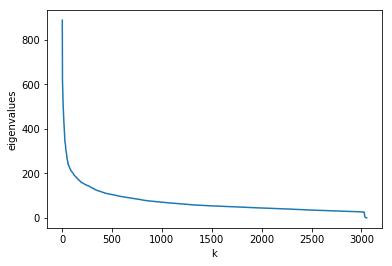

In [11]:
#plot eigen gap to determine number of clusters
plt.plot(range(1,len(ids)+1),sorted(eigen_val,reverse = True))
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()

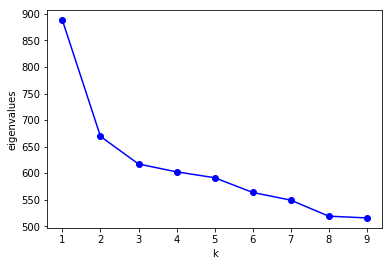

In [12]:
plt.plot(range(1,10),sorted(eigen_val,reverse = True)[0:9],'bo-')
plt.xlabel('k')
plt.ylabel('eigenvalues')
plt.show()
#choose 2 clusters

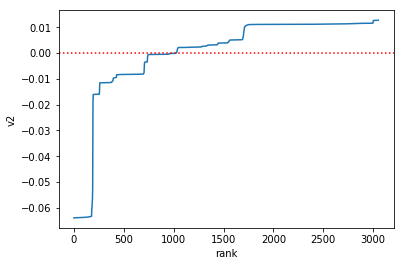

In [21]:
v2 = eigen_vec[:,1] #second smallest 
plt.plot(range(len(ids)),sorted(v2))
plt.axhline(linestyle = ':',color='r')
plt.xlabel('rank')
plt.ylabel('v2')
plt.show()

In [25]:
# classify nodes into 2 clusters
c1 = {ids[i]:1 for i in np.where(v2>0)[0]} #nodes in community 1 if v2 > 0
c2 = {ids[i]:2 for i in np.where(v2<0)[0]} #nodes in community 2 if v2 < 0
c2.update(c1)

In [26]:
len(c2)

3053

In [27]:
with open('./data/authors_communities_2016_q1_k25core_newman.pickle', 'wb') as picklefile:
    pickle.dump(c2, picklefile, protocol=2)